In [63]:
import math
import numpy as np

H = 180  # mm
h = 22  # mm
HOLE_DIAMETER = 0.75  # mm
PIXEL_PITCH = 1.894  # mm
b = 1.5 * PIXEL_PITCH  # mm
HOLE_PITCH = 3 * PIXEL_PITCH  # mm


In [4]:
def divergence_angle(H, b):
    half_angle = math.degrees(math.atan(b * 0.5 / H))
    return 2 * half_angle


def half_angle(H, b):
    return math.degrees(math.atan(b * 0.5 / H))


def displacement(angle, h):
    return h * math.tan(math.radians(angle))


In [59]:
OFFSET_X = 2  # mm
OFFSET_Y = 1  # mm
hole_x = np.arange(
    -1.5 * HOLE_PITCH + OFFSET_X, 1.6 * HOLE_PITCH + OFFSET_X, HOLE_PITCH
)
hole_y = np.arange(
    1.5 * HOLE_PITCH + OFFSET_Y, -1.6 * HOLE_PITCH + OFFSET_Y, -HOLE_PITCH
)
hole_x, hole_y = np.meshgrid(hole_x, hole_y)

print(hole_x)
print(hole_y)
hole_positions = np.stack((hole_x, hole_y), axis=-1)
# print(hole_positions)

for i, hole_position in enumerate(hole_positions):
    print(f"--- {i = } ---")
    for j, hp in enumerate(hole_position):
        print(f"{j = }")
        print(hp)


[[-6.523 -0.841  4.841 10.523]
 [-6.523 -0.841  4.841 10.523]
 [-6.523 -0.841  4.841 10.523]
 [-6.523 -0.841  4.841 10.523]]
[[ 9.523  9.523  9.523  9.523]
 [ 3.841  3.841  3.841  3.841]
 [-1.841 -1.841 -1.841 -1.841]
 [-7.523 -7.523 -7.523 -7.523]]
--- i = 0 ---
j = 0
[-6.523  9.523]
j = 1
[-0.841  9.523]
j = 2
[4.841 9.523]
j = 3
[10.523  9.523]
--- i = 1 ---
j = 0
[-6.523  3.841]
j = 1
[-0.841  3.841]
j = 2
[4.841 3.841]
j = 3
[10.523  3.841]
--- i = 2 ---
j = 0
[-6.523 -1.841]
j = 1
[-0.841 -1.841]
j = 2
[ 4.841 -1.841]
j = 3
[10.523 -1.841]
--- i = 3 ---
j = 0
[-6.523 -7.523]
j = 1
[-0.841 -7.523]
j = 2
[ 4.841 -7.523]
j = 3
[10.523 -7.523]


In [55]:
hole_positions[3, 0]

array([10.523, -7.523])

(-12.0, 12.0)

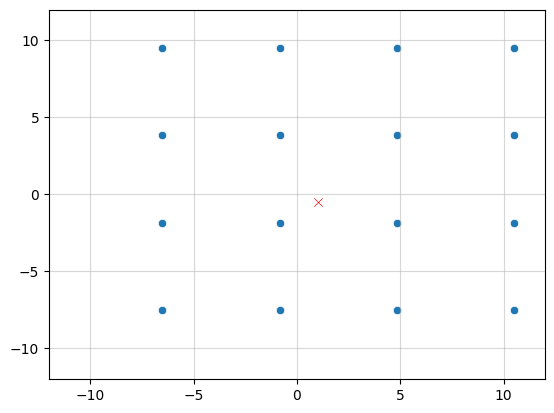

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

POINT_SOURCE = (1, -0.5)

sns.scatterplot(x=hole_x.flatten(), y=hole_y.flatten())
sns.scatterplot(x=[POINT_SOURCE[0]], y=[POINT_SOURCE[1]], color="red", marker="x")
plt.grid(alpha=0.5)
plt.xlim(-12, 12)
plt.ylim(-12, 12)


In [145]:
H = 100
h = 20
POINT_SOURCE = (0, 0)

distances = np.linalg.norm(hole_positions - POINT_SOURCE, axis=-1)
print(distances)
x_distances = hole_x - POINT_SOURCE[0]
y_distances = hole_y - POINT_SOURCE[1]


# print(x_distances)
# print(y_distances)
def shift_distance(distance, H, h):
    return distance * h / H


s = shift_distance(distances, H=100, h=20)
# print(s)
x_shifts = shift_distance(x_distances, H=100, h=20)
y_shifts = shift_distance(y_distances, H=100, h=20)
# print(x_shifts)
# print(y_shifts)

new_x = hole_x + x_shifts
new_y = hole_y + y_shifts

# divide distances by s element wise
# print(distances / s)
diameters = np.ones_like(hole_x) * HOLE_DIAMETER * (1 + h / H)
print(diameters)

[[11.54283579  9.56006328 10.68282781 14.19228868]
 [ 7.56986195  3.93199212  6.17968947 11.20208954]
 [ 6.7778175   2.02399654  5.17924338 10.68282781]
 [ 9.95716114  7.56986195  8.94599408 12.93557335]]
[[0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9]]


In [146]:
# new_x = np.zeros_like(hole_x)
# new_y = np.zeros_like(hole_y)
# for i in range(len(hole_x)):
#     for j in range(len(hole_x[0])):
#         if hole_x[i,j] > POINT_SOURCE[0]: # if x is to the right of the source
#             new_x[i,j] = hole_x[i,j] + x_shifts[i,j]
#         else:
#             new_x[i,j] = hole_x[i,j] + x_shifts[i,j]

# for i in range(len(hole_y)):
#     for j in range(len(hole_y[0])):
#         if hole_y[i,j] > POINT_SOURCE[1]: # if x is to the right of the source
#             new_y[i,j] = hole_y[i,j] + y_shifts[i,j]
#         else:
#             new_y[i,j] = hole_y[i,j] + y_shifts[i,j]


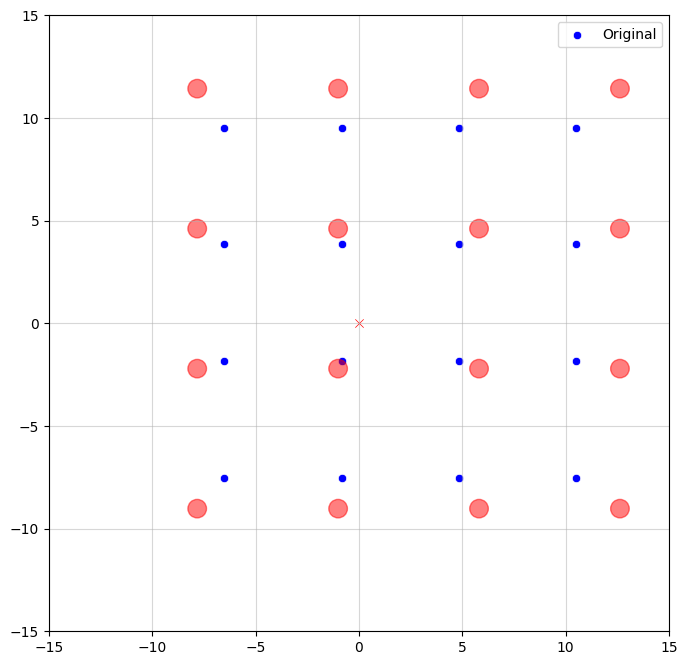

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=hole_x.flatten(), y=hole_y.flatten(), label="Original", color="blue")
# sns.scatterplot(x=new_x.flatten(), y=new_y.flatten(), label="Shifted", color="red")
sns.scatterplot(x=[POINT_SOURCE[0]], y=[POINT_SOURCE[1]], color="red", marker="x")
plt.grid(alpha=0.5)
# draw a circle
for new_xi, new_yi, di in zip(new_x.flatten(), new_y.flatten(), diameters.flatten()):
    circle = plt.Circle((new_xi, new_yi), di / 2, color="red", fill=True, alpha=0.5)
    plt.gca().add_artist(circle)
# circle = plt.Circle(POINT_SOURCE, 2, color='red', fill=False)
# plt.gca().add_artist(circle)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.legend()

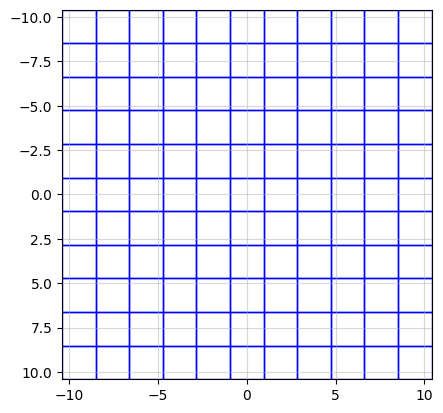

In [150]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the size of each square and the grid dimensions
square_size = 1.894
grid_size = 11

# Calculate the offset to center the grid
offset = (grid_size * square_size) / 2

# Create a figure and an axes
fig, ax = plt.subplots()

# Add squares to the axes
for i in range(grid_size):
    for j in range(grid_size):
        x = (i * square_size) - offset
        y = (j * square_size) - offset
        square = patches.Rectangle(
            (x, y), square_size, square_size, edgecolor="blue", facecolor="none"
        )
        ax.add_patch(square)

# Set the aspect of the plot to be equal
ax.set_aspect("equal")

# Set limits
ax.set_xlim(-offset, offset)
ax.set_ylim(-offset, offset)
ax.grid(True, alpha=0.5)

# Display the plot
plt.gca().invert_yaxis()
plt.show()

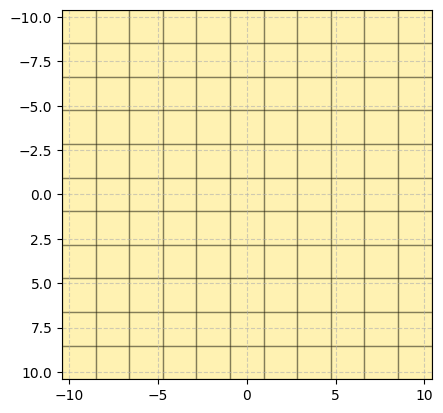

In [154]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the size of each square and the grid dimensions
square_size = 1.894
grid_size = 11

# Calculate the offset to center the grid
offset = (grid_size * square_size) / 2

# Create a figure and an axes
fig, ax = plt.subplots()

# Add squares to the axes
for i in range(grid_size):
    for j in range(grid_size):
        x = (i * square_size) - offset
        y = (j * square_size) - offset
        square = patches.Rectangle(
            (x, y),
            square_size,
            square_size,
            edgecolor="black",
            facecolor="gold",
            alpha=0.3,
        )
        ax.add_patch(square)

# Set the aspect of the plot to be equal
ax.set_aspect("equal")

# Set limits
ax.set_xlim(-offset, offset)
ax.set_ylim(-offset, offset)
# ax.grid(True, alpha=0.6, linestyle="--")

# Display the plot
plt.gca().invert_yaxis()
plt.show()